**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv(r"C:\Users\ekta hinduja\Downloads\Data_Exploration_and_Cleaning\cleaned_data.csv")

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [4]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [7]:
grid={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}


________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [8]:
from sklearn.model_selection import GridSearchCV
a=GridSearchCV(rf, param_grid=grid, scoring='accuracy',
                            n_jobs=-1, iid=False, refit=True,
                            cv=4, verbose=2, error_score=np.nan, return_train_score=True)


____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [9]:
a.fit(X_train, y_train)


Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  3.0min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],


___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [10]:
y_pred = a.predict(X_test)
y_pred


array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

**Find the best hyperparameters from the cross-validation.**

In [11]:
print(a.best_params_)


{'max_depth': 12, 'n_estimators': 100}


________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [12]:
# Create a 5x5 grid
means = a.cv_results_['mean_test_score']
means=np.array(means)
grid1=np.array([[3,6,9,12],[10,50,100,200]])
means



array([0.81885526, 0.813417  , 0.81252614, 0.81482346, 0.81974595,
       0.82030853, 0.82040231, 0.82040232, 0.81810509, 0.82054294,
       0.82077736, 0.82040231, 0.81618313, 0.81993338, 0.82105861,
       0.82096482])

In [ ]:
# Set color map to `plt.cm.jet`


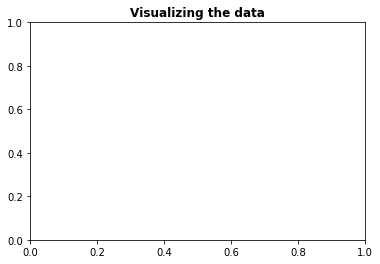

In [13]:
# Visualize pcolormesh
plt.title('Visualizing the data', fontweight ="bold") 
plt.show()


________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [14]:
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

Feature: 0, Score: 0.03580
Feature: 1, Score: 0.00455
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.72728
Feature: 5, Score: 0.01197
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00708
Feature: 8, Score: 0.01193
Feature: 9, Score: 0.01857
Feature: 10, Score: 0.00425
Feature: 11, Score: 0.07646
Feature: 12, Score: 0.02406
Feature: 13, Score: 0.03395
Feature: 14, Score: 0.01902
Feature: 15, Score: 0.00620
Feature: 16, Score: 0.01887


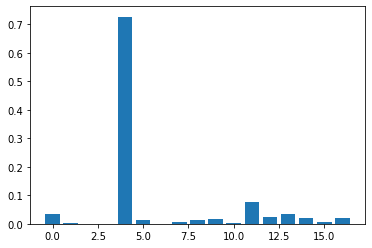

In [15]:
# Create a dataframe of the feature names and importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [16]:
# Sort values by importance
importance.sort()
importance


array([0.        , 0.        , 0.        , 0.00425207, 0.00455407,
       0.00620446, 0.00708062, 0.01192769, 0.01196955, 0.01856792,
       0.01887171, 0.01901978, 0.02406221, 0.03395119, 0.03579668,
       0.07645899, 0.72728305])

In [17]:
help(plt.pcolormesh)


Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading='flat', antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolor([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. note::
    
       ``pcolormesh()`` is similar to :func:`~Axes.pcolor`. It's much
       faster and preferred in most cases. For a detailed discussion on
       the differences see
       :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : array_like
        A scalar 2-D array. The values will be color-mapped.
    
    X, Y : array_like, optional
        The coordinates of the quadrilateral corners. The quadrilateral
        for ``C[i,j]`` has corners at::
    
            (X[i+1, j], Y[i+1, j])   